In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

adata = sc.read("/mnt/data/project/25_02_15_stag_analysis/merge_annotate_result/TNRC18_Th1/Annotated_phenotype_hypr_seq.h5ad")
print(adata.X.shape[1])
sc.pp.filter_genes(adata, min_counts=3)
print(adata.X.shape[1])
adata_subset = adata[~(adata.obs["genotype_annotation"]=="unedited")]

sc.pp.normalize_total(adata_subset, 1e6)
adata_subset.X = np.log(adata_subset.X+1)


sc.pp.pca(adata_subset)
sc.pp.neighbors(adata_subset)
#sc.tl.umap(adata_subset)

#sc.pl.umap(adata_subset, color="genotype_annotation")

sc.tl.leiden(adata_subset, resolution=0.1)
#sc.pl.umap(adata_subset, color="leiden")

adata_subset_v1  = adata_subset[~(adata_subset.obs["leiden"]=="2")]

sc.pp.pca(adata_subset_v1)
sc.pp.neighbors(adata_subset_v1)
sc.tl.leiden(adata_subset_v1, resolution=0.1)
sc.tl.umap(adata_subset_v1)

sc.write("TNRC18_Th1_subset_geno_cluster.h5ad", adata_subset_v1)

sc.tl.rank_genes_groups(adata_subset_v1, groupby="leiden", method="wilcoxon")
df_deg = sc.get.rank_genes_groups_df(adata_subset_v1, group=None)
df_deg.to_csv("figure4f_deg.csv")

table = pd.read_csv("/mnt/data/project/25_02_15_stag_analysis/notebooks/TNRC18_Th1_CD4_CD8/4g_genelist.csv", sep="\t", header=None)

genes = [str(i)  for i in table[1] if str(i) in adata_subset_v1.var_names]
# sc.pl.DotPlot(adata_subset_v1, genes, groupby="leiden", dendrogram=True, save="figure4f.png")


2315
2315


/tmp/ipykernel_8537/531941394.py:11: FutureWarning: The specified parameters ('target_sum',) are no longer positional. Please specify them like `target_sum=1000000.0`
  sc.pp.normalize_total(adata_subset, 1e6)
/mnt/data/miniconda3/envs/stag/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/tmp/ipykernel_8537/531941394.py:21: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_subset, resolution=0.1)
/mnt/data/miniconda3/envs/stag/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


In [3]:
adata_subset_v1 = sc.read("/mnt/data/project/25_02_15_stag_analysis/notebooks/TNRC18_Th1_CD4_CD8/TNRC18_Th1_subset_geno_cluster.h5ad")


In [4]:
table = pd.read_csv("/mnt/data/project/25_02_15_stag_analysis/notebooks/TNRC18_Th1_CD4_CD8/4g_genelist_2.csv", sep="\t", header=None)

In [5]:
table[0]

0        IFNG
1         IL2
2         TNF
3        IL10
4        IL18
5        IL12
6        CSF2
7        IL27
8         IL3
9        IL22
10        LTA
11        LTB
12      TBX21
13      STAT1
14      STAT4
15      RUNX3
16    IL12RB2
17      CXCR3
18       CCR5
19     IFNGR1
20     IFNGR2
21       CD27
22       GZMA
23       GZMB
24       PRF1
25    BHLHE40
26     SLC7A5
27      CXCR6
28      MKI67
29      TOP2A
30      CCNB1
31      CCNA2
32       PLK1
33      AURKA
34      AURKB
35       CDT1
36      BRCA2
37       E2F1
38       E2F2
39      MYBL2
40      STAT6
41       JAK3
42       JAK2
43     IFITM1
44     TRIM22
45      ISG20
46      CXCR6
47       IL16
48       IL7R
49       LFE1
50       CD27
51       CCR7
52       TCF7
Name: 0, dtype: object

In [6]:
genes = [str(i)  for i in table[0] if str(i) in adata_subset_v1.var_names]


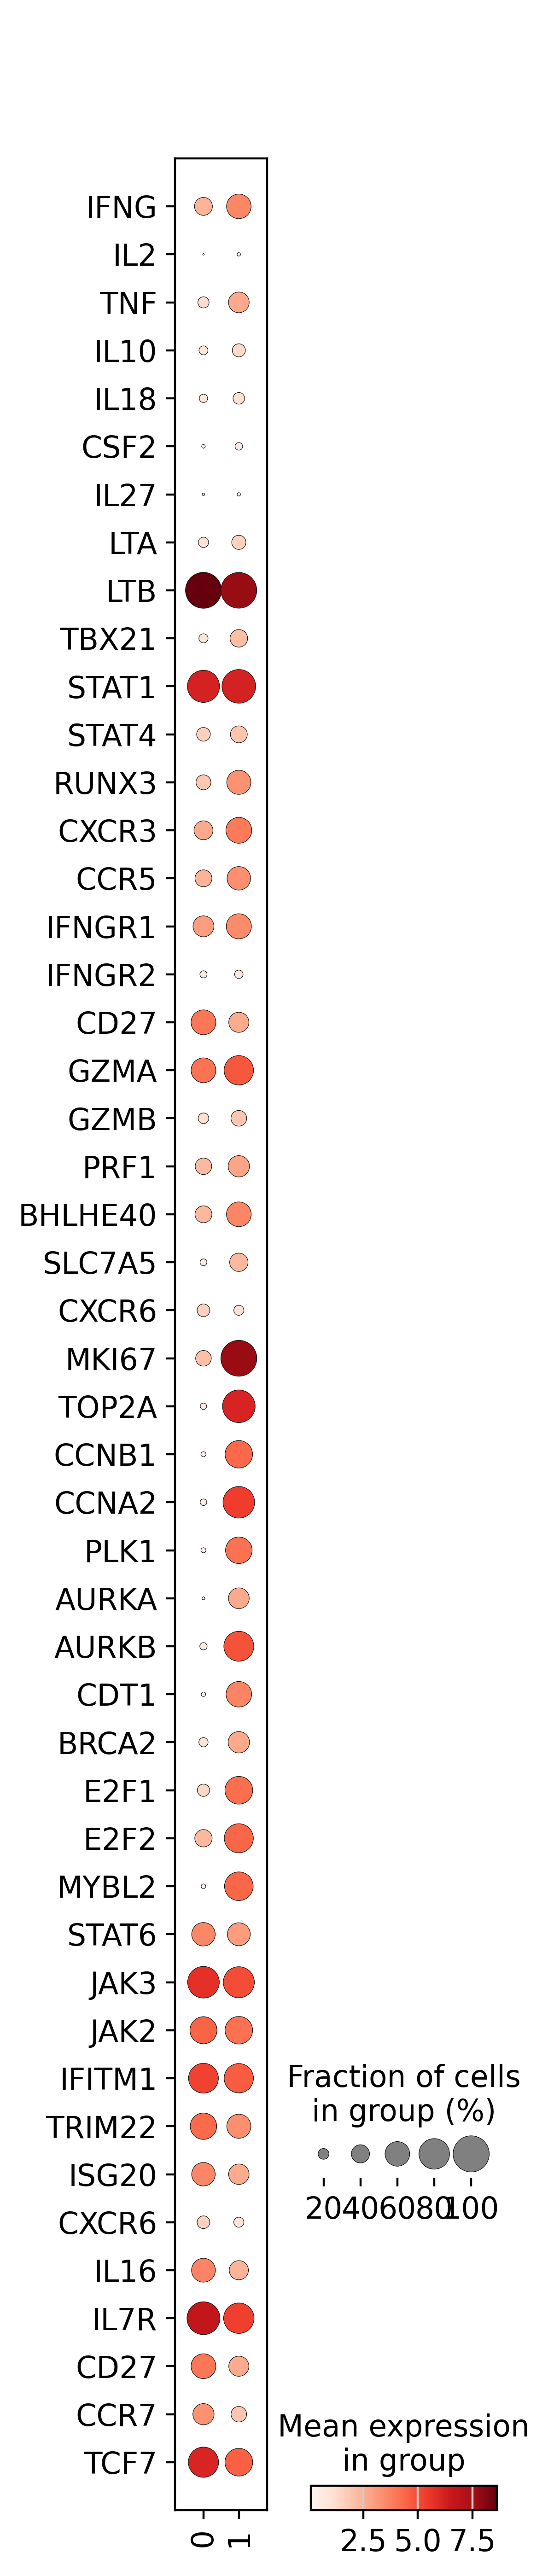

In [7]:
import scanpy as sc
sc.settings.set_figure_params(dpi=200)

sc.pl.dotplot(adata_subset_v1, genes, groupby="leiden", standard_scale=None, dendrogram=True, swap_axes=True, save="dotplot.svg")



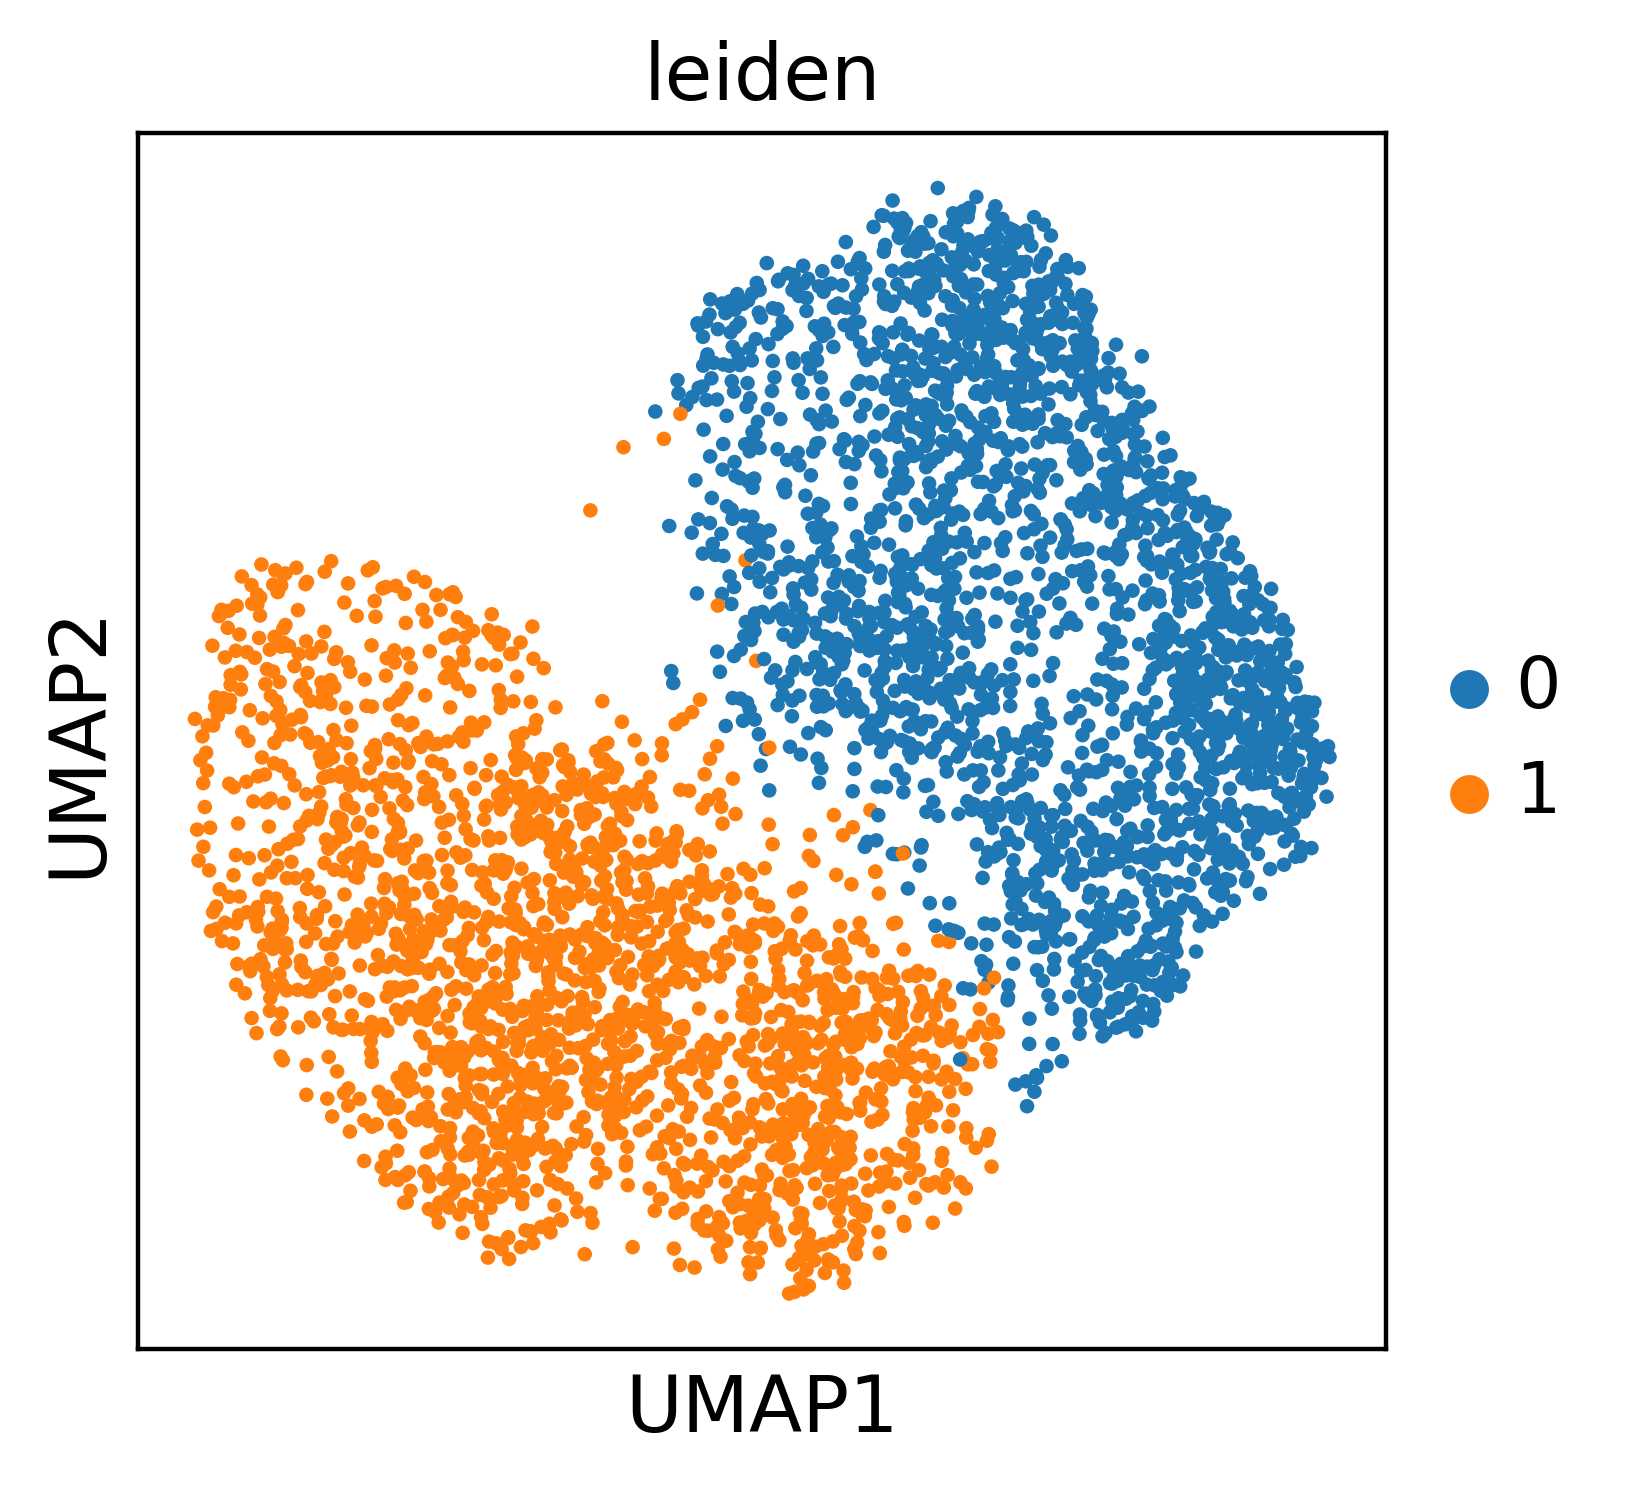

In [8]:
sc.pl.umap(adata_subset_v1,color="leiden", save="umap.svg")


In [11]:
adata_subset_v1.obs["genotype_annotation"].value_counts()

genotype_annotation
22_hom                              748
mixed                               672
AAV_ACBE3                           561
Double_Hom                          507
AAV4GPP_KO                          454
Double_Het                          316
22_hom_21_het                       298
TNRC18-rs748670681_hom_bystander    260
22_het                              241
TNRC18-rs748670681_het_bystander     95
21_hom                               63
TNRC18-21CT_hom_bystander            40
21_het                               39
TNRC18-21CT_het_bystander            32
22_het_21_hom                        28
Name: count, dtype: int64

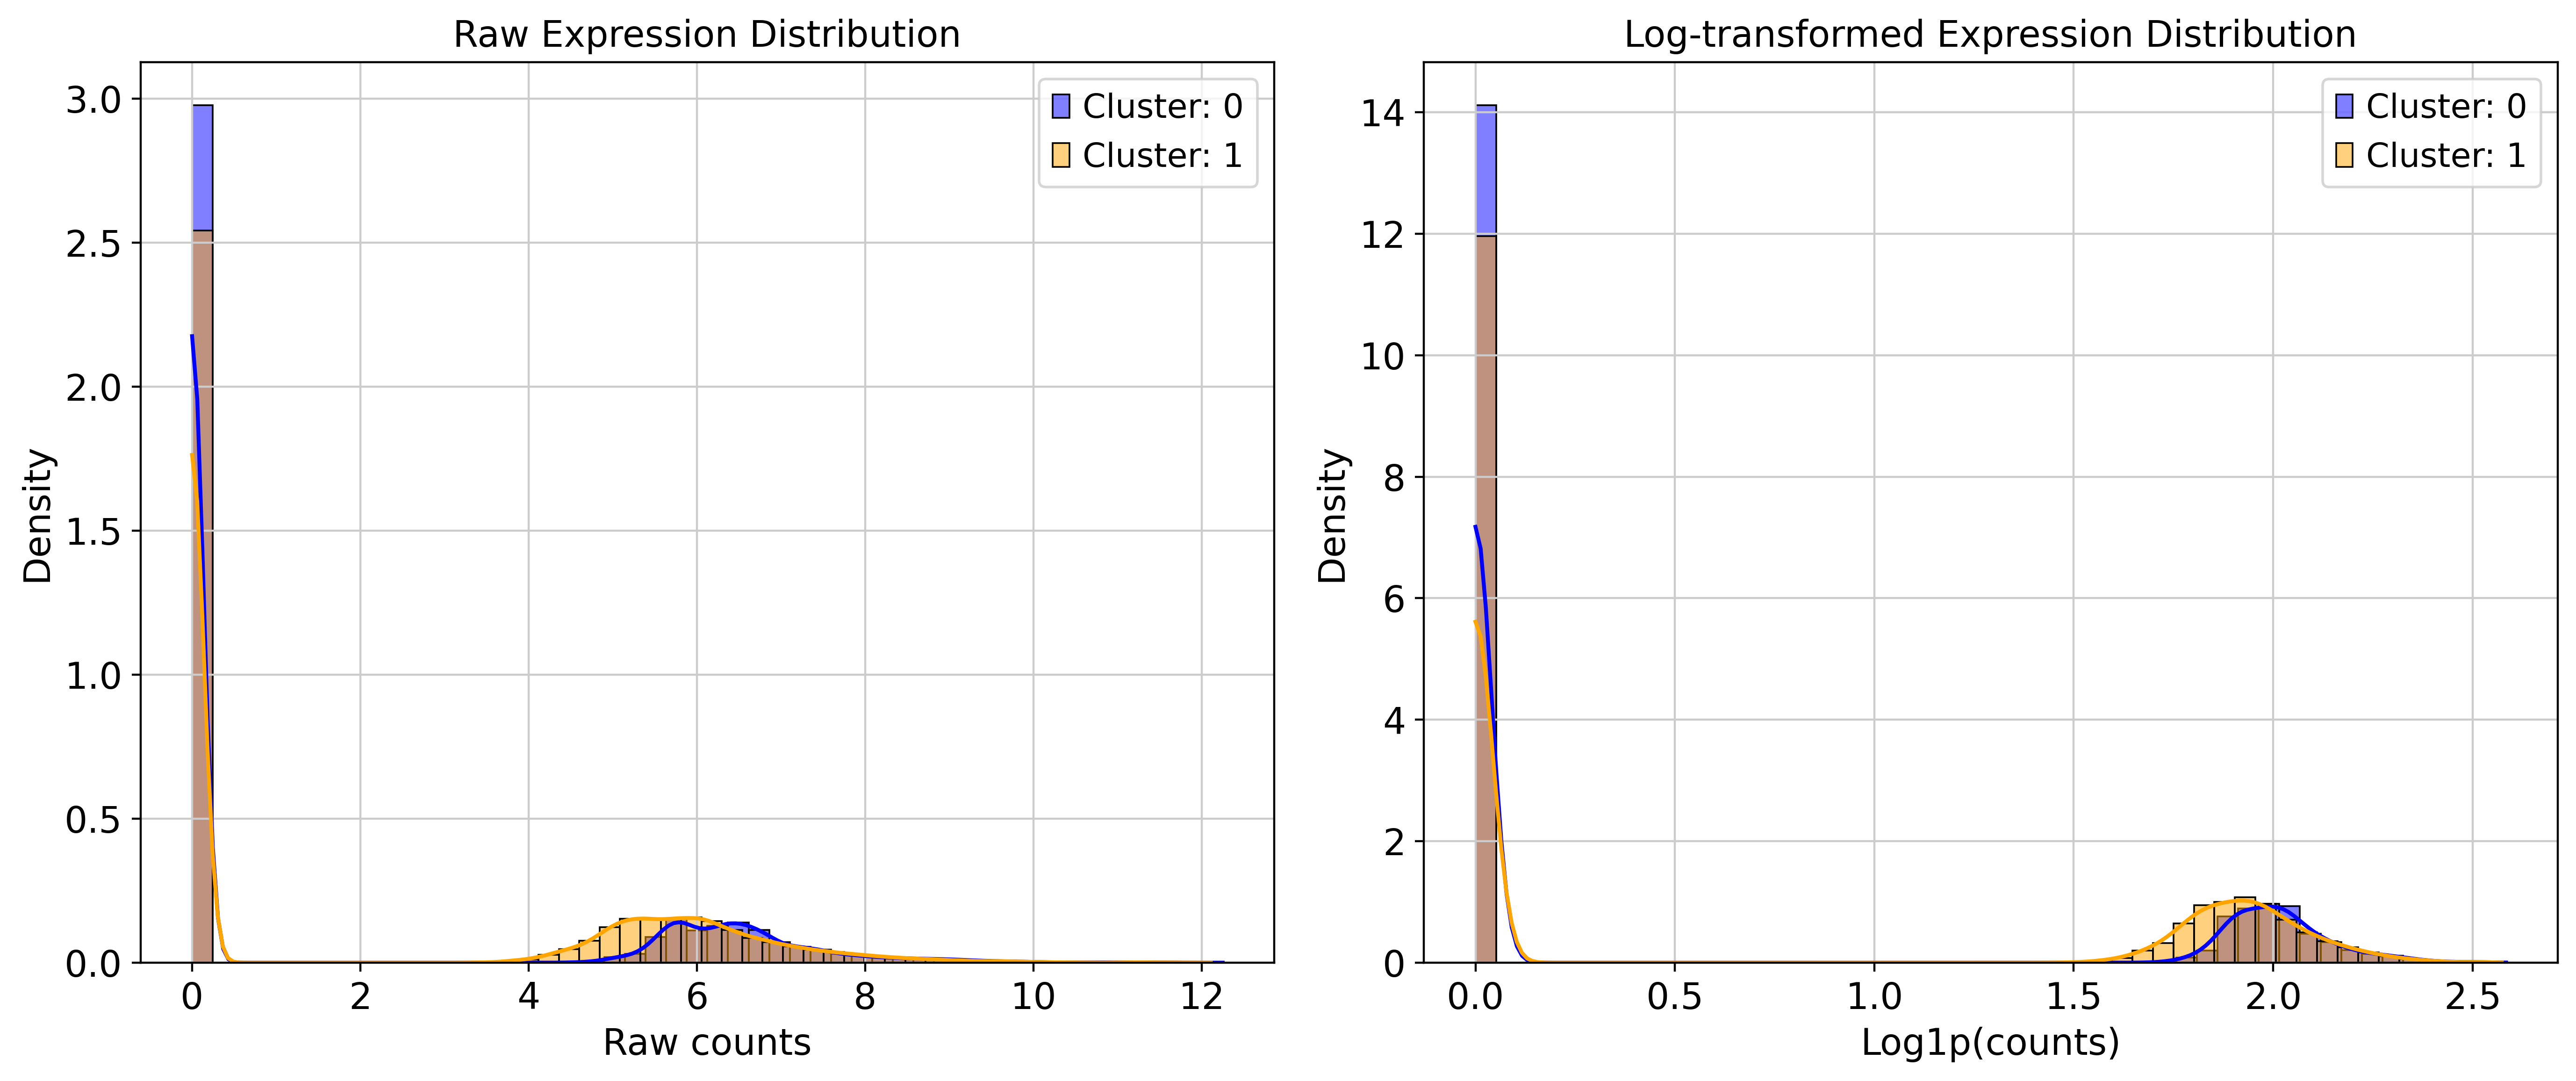

In [10]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define your cluster of interest and create masks for the two groups
cluster_interest = '0'  # Replace with your actual cluster name
mask_interest = adata_subset_v1.obs['leiden'] == cluster_interest
mask_reference = adata_subset_v1.obs['leiden'] != cluster_interest

# Use raw counts if available; otherwise, fallback to adata.X
if adata_subset_v1.raw is not None:
    X_raw = adata_subset_v1.raw.X
else:
    X_raw = adata_subset_v1.X

# Convert to a dense numpy array if necessary (e.g., if it's a sparse matrix)
if hasattr(X_raw, 'toarray'):
    X_raw = X_raw.toarray()

# Extract expression values for both groups and flatten them for plotting
raw_interest = X_raw[mask_interest].flatten()
raw_reference = X_raw[mask_reference].flatten()

# Compute the log-transformed values using log1p (log(1+x))
log_interest = np.log1p(raw_interest)
log_reference = np.log1p(raw_reference)

# Create subplots for raw and log-transformed distributions
plt.figure(figsize=(14, 6))

# Raw expression histogram
plt.subplot(1, 2, 1)
sns.histplot(raw_interest, bins=50, kde=True, color='blue', stat='density', label=f'Cluster: {cluster_interest}')
sns.histplot(raw_reference, bins=50, kde=True, color='orange', stat='density', label='Cluster: 1', alpha=0.5)
plt.title('Raw Expression Distribution')
plt.xlabel('Raw counts')
plt.ylabel('Density')
plt.legend()

# Log-transformed expression histogram
plt.subplot(1, 2, 2)
sns.histplot(log_interest, bins=50, kde=True, color='blue', stat='density', label=f'Cluster: {cluster_interest}')
sns.histplot(log_reference, bins=50, kde=True, color='orange', stat='density', label='Cluster: 1', alpha=0.5)
plt.title('Log-transformed Expression Distribution')
plt.xlabel('Log1p(counts)')
plt.ylabel('Density')
plt.legend()
plt.savefig("volcano_explain.png", dpi=300)
plt.savefig("volcano_explain.svg", dpi=300)

plt.tight_layout()
plt.show()


In [27]:
df_deg["pvals_adj"].min()

np.float64(0.0)

In [28]:
import matplotlib.pyplot as plt

/mnt/data/miniconda3/envs/stag/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


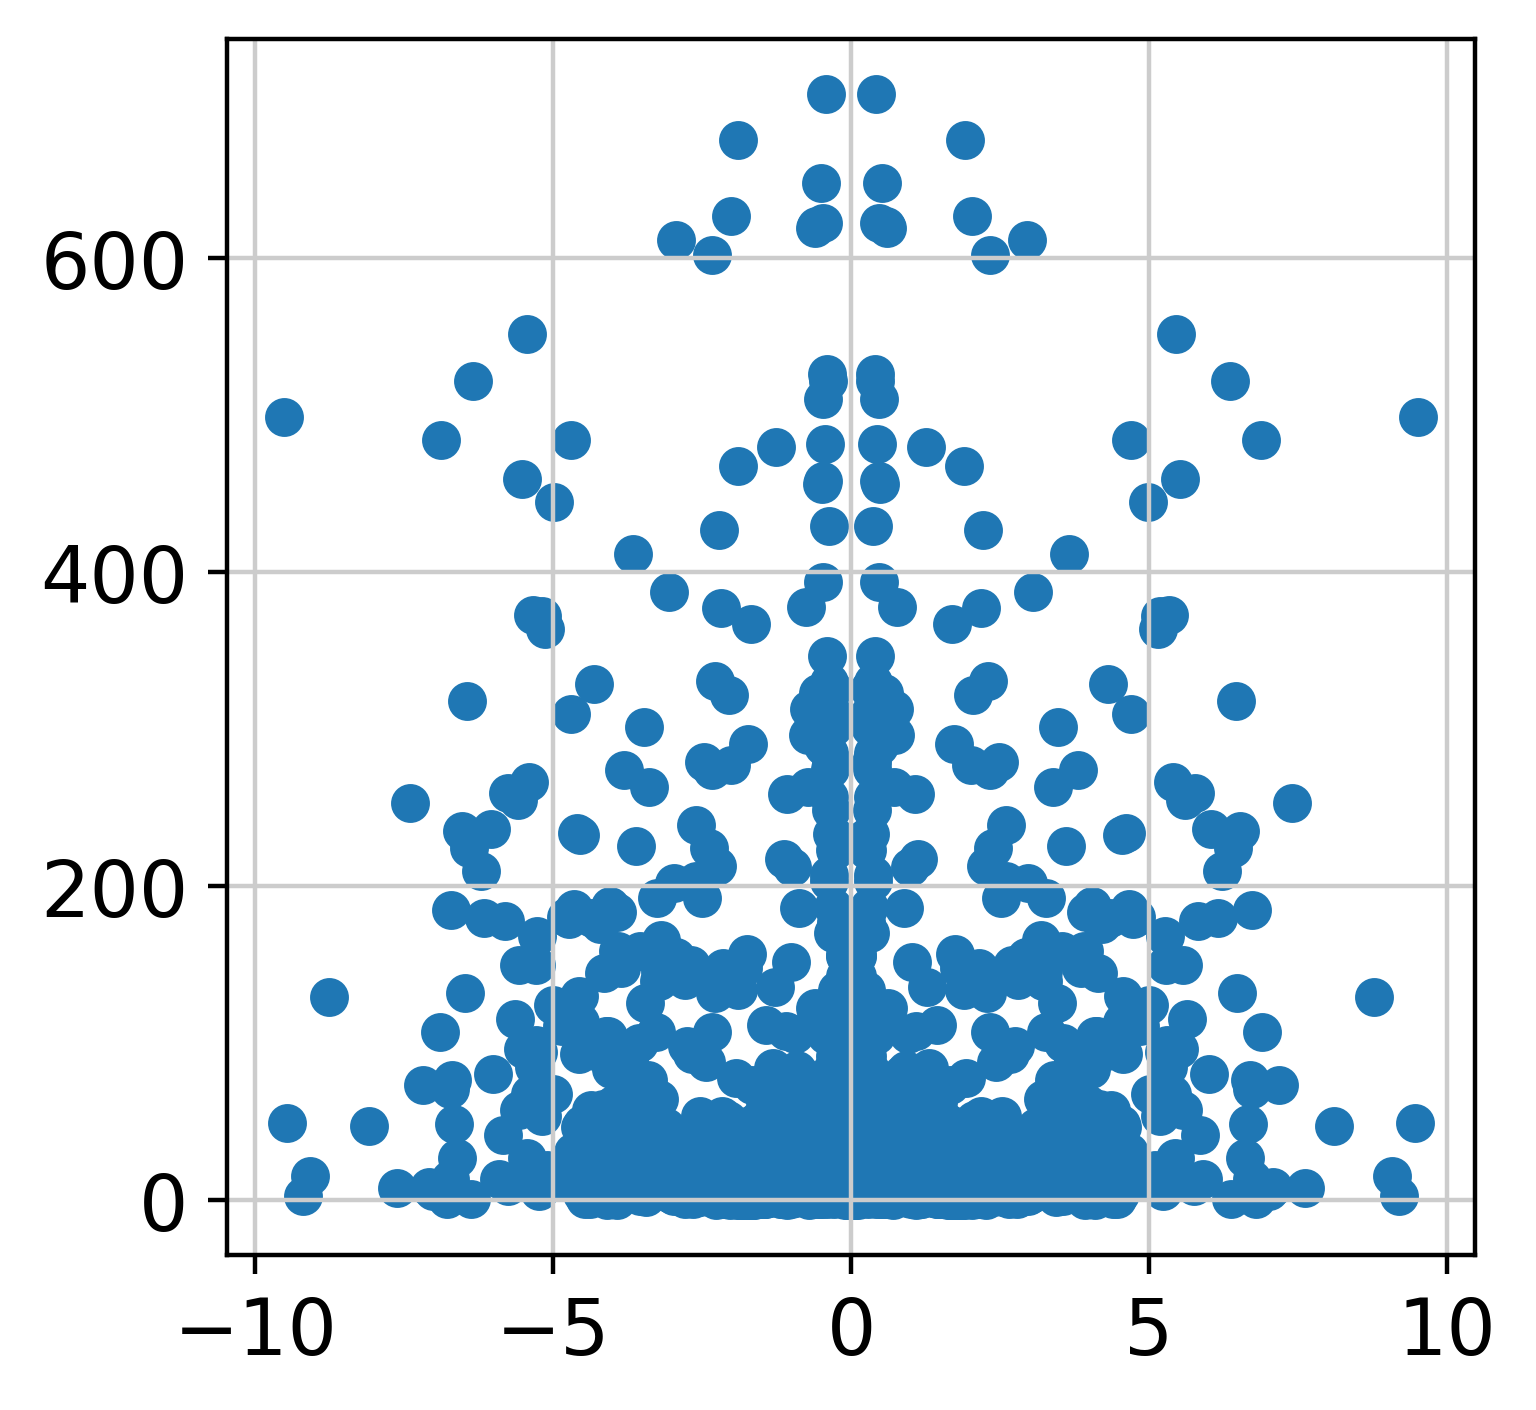

In [29]:
plt.scatter(df_deg["logfoldchanges"], -np.log(df_deg["pvals_adj"]))

In [22]:
import matplotlib.pyplot as plt

In [ ]:
def plot_genotype_cluster_composition(adata, genotype_column='genotype_annotation', cluster_column='leiden', save_path="./", task_name=""):
    """
    Plots the composition of leiden clusters within each genotype as a stacked bar chart.
    
    Parameters:
    - adata: AnnData object containing the data.
    - genotype_column: str, the column in adata.obs representing genotype annotations.
    - cluster_column: str, the column in adata.obs representing leiden cluster labels.
    """
    
    # Extract the relevant columns from adata.obs
    df = adata.obs[[genotype_column, cluster_column]]
    
    # Count the occurrences of each leiden cluster within each genotype
    composition = df.groupby([genotype_column, cluster_column]).size().unstack(fill_value=0)
    
    composition.to_csv("raw_composition_th1.csv")
    # Normalize counts to get the proportion of each leiden cluster within each genotype
    composition = composition.div(composition.sum(axis=1), axis=0)
    composition.to_csv("norm_composition_th1.csv")
    # Plot the composition as a stacked bar chart
    ax = composition.plot(kind='bar', stacked=True, figsize=(10, 7))
    
    # Add labels and title
    plt.title('Leiden Cluster Composition by Genotype')
    plt.xlabel('Genotype')
    plt.ylabel('Proportion of Each Cluster')
    plt.legend(title=cluster_column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f"{save_path}/{task_name}_composition.svg")
    plt.savefig(f"{save_path}/{task_name}_composition.png")

/tmp/ipykernel_249018/1236254033.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  composition = df.groupby([genotype_column, cluster_column]).size().unstack(fill_value=0)


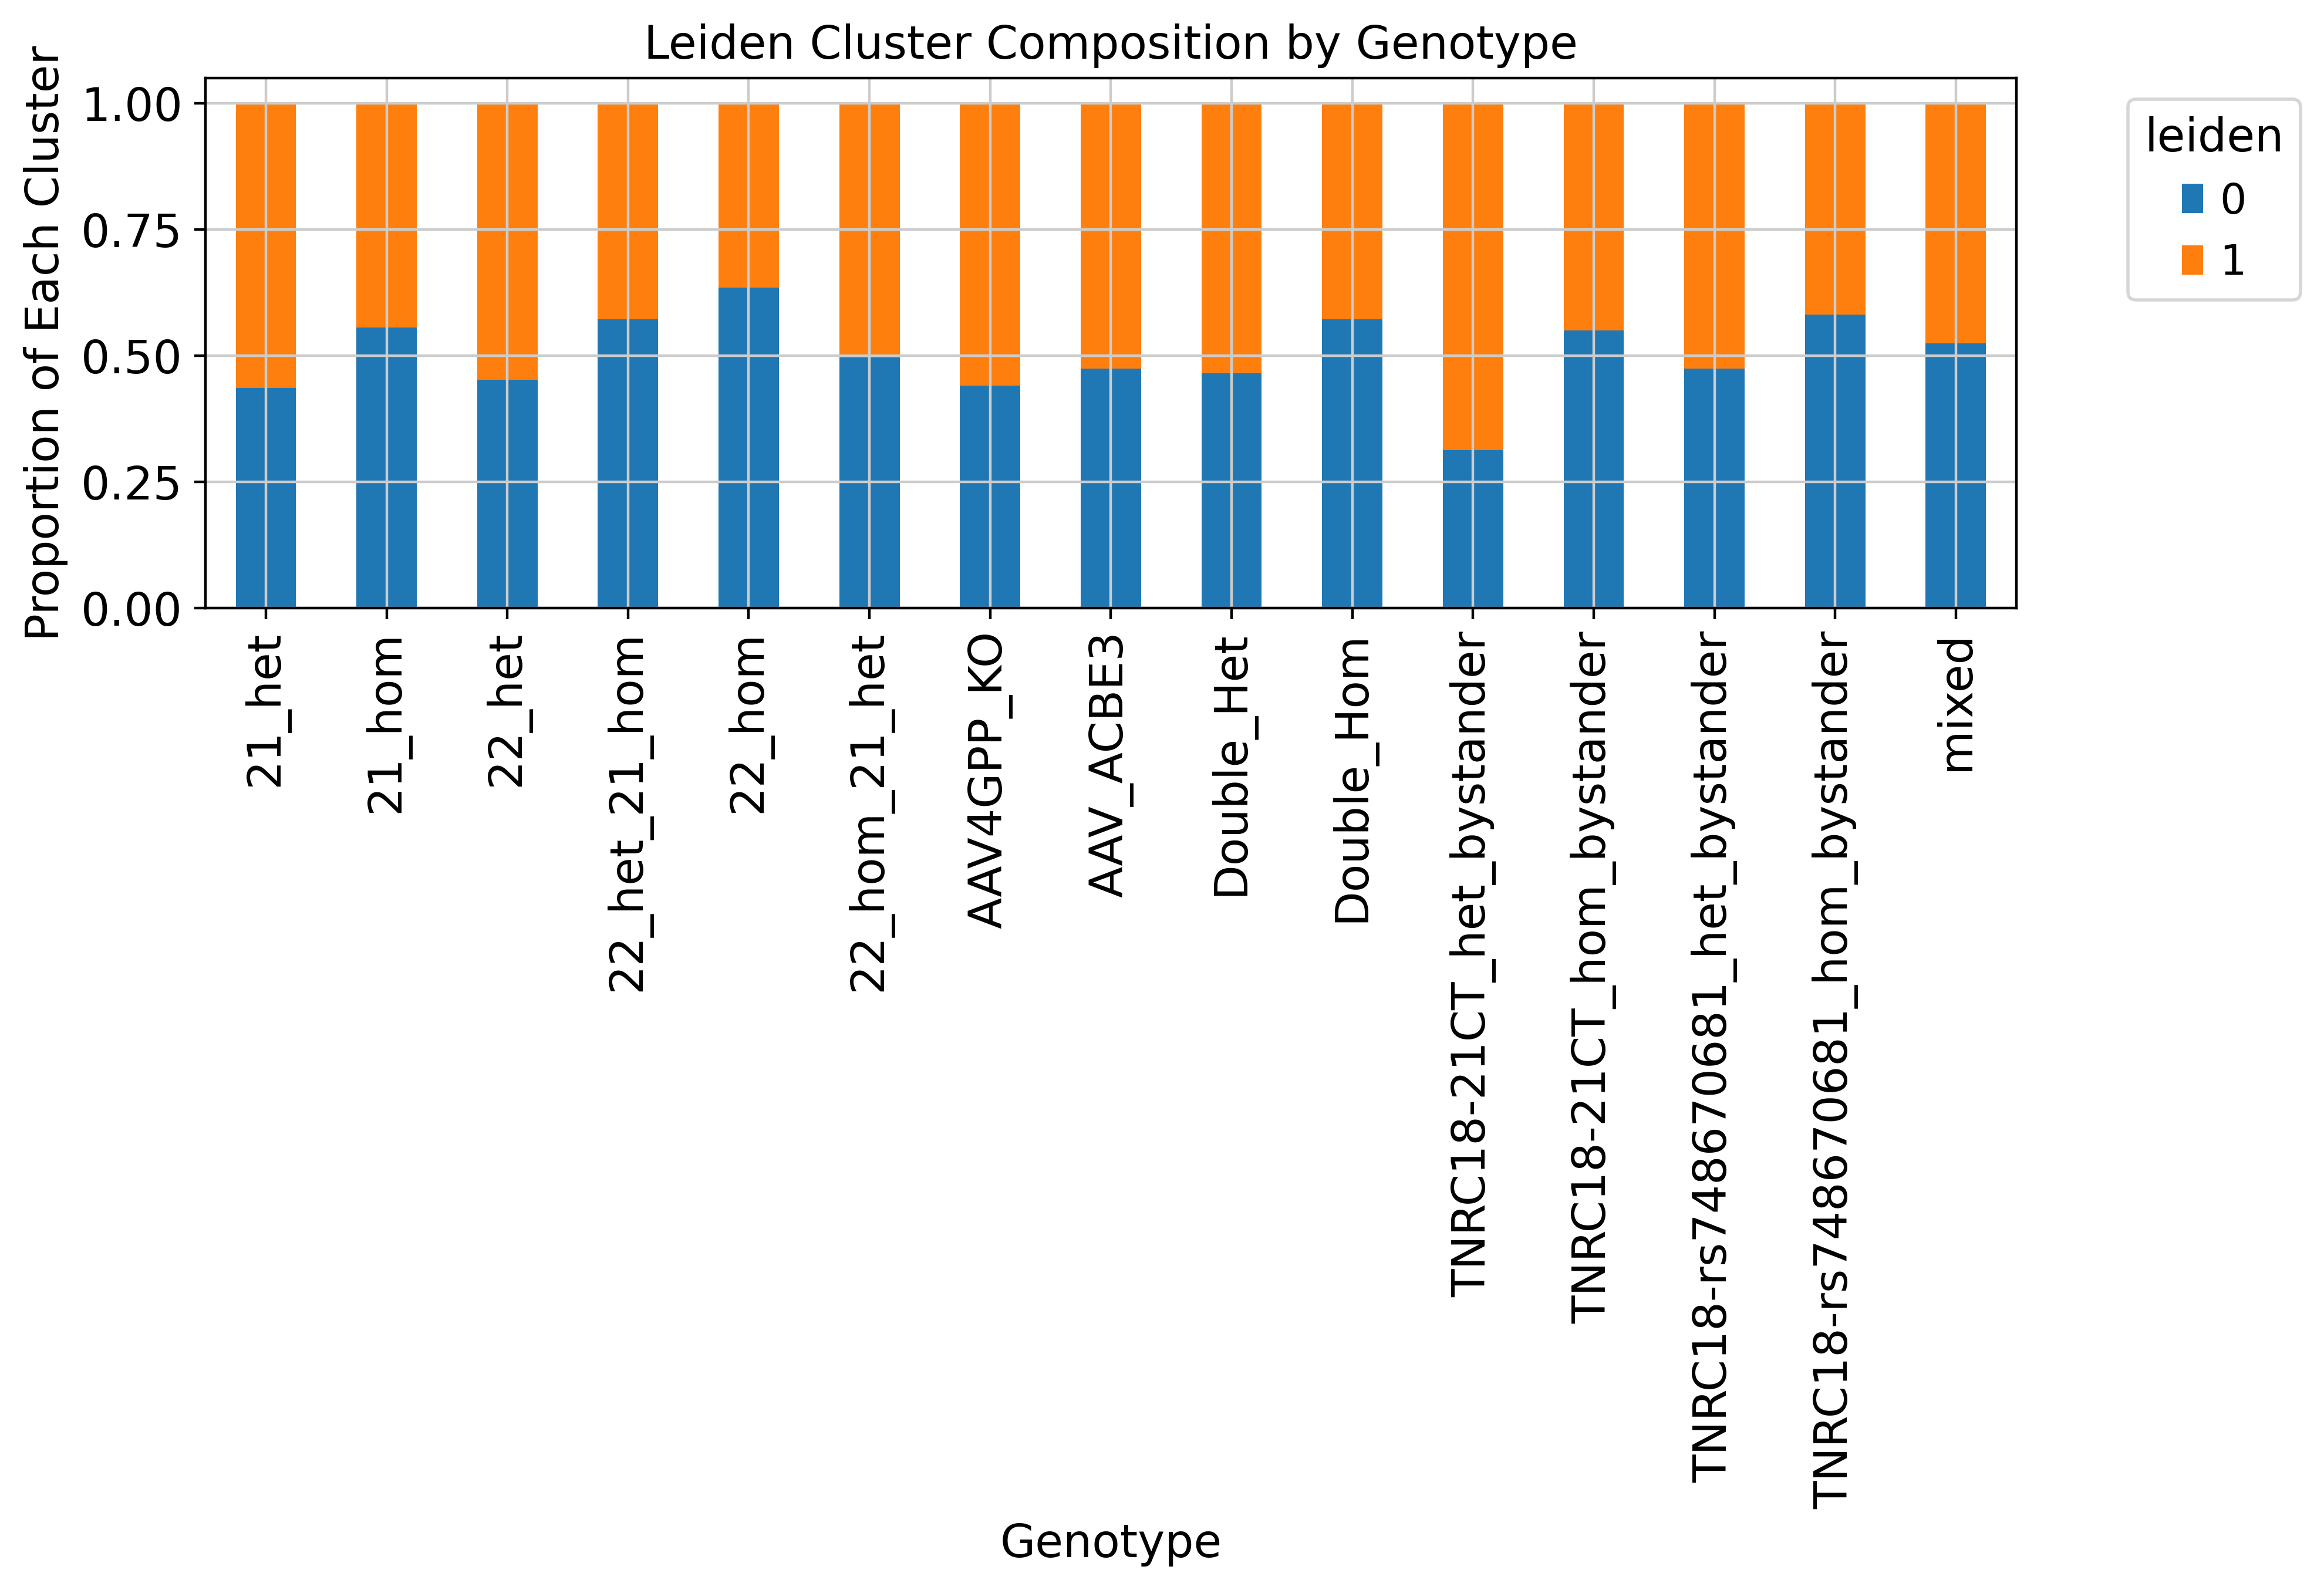

In [24]:
plot_genotype_cluster_composition(adata_subset_v1, genotype_column="genotype_annotation")